In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statistics import NormalDist
from scipy.stats import norm, binom
from scipy.special import comb
from IPython.display import display, Latex

# Reference

> [Unit: Random Variables](https://www.khanacademy.org/math/statistics-probability/random-variables-stats-library)

---

# [Random Variables](https://en.wikipedia.org/wiki/Random_variable)

> [Random variables](https://www.investopedia.com/terms/r/random-variable.asp)

A **random variable** ${\displaystyle X}$ is a [measurable function](https://en.wikipedia.org/wiki/Measurable_function "Measurable function") ${\displaystyle X\colon \Omega \to E}$ from a set of possible [outcomes](https://en.wikipedia.org/wiki/Outcome_(probability) "Outcome (probability)") ${\displaystyle \Omega }$ to a [measurable space](https://en.wikipedia.org/wiki/Measurable_space "Measurable space") ${\displaystyle E}$. The technical axiomatic definition requires ${\displaystyle \Omega }$ to be a sample space of a [probability triple](https://en.wikipedia.org/wiki/Probability_space "Probability space") ${\displaystyle (\Omega ,{\mathcal {F}},\operatorname {P})}$ (see the [measure-theoretic definition](https://en.wikipedia.org/wiki/Random_variable#Measure-theoretic_definition)). A random variable is often denoted by capital [roman letters](https://en.wikipedia.org/wiki/Latin_script "Latin script") such as ${\displaystyle X}$, ${\displaystyle Y}$, ${\displaystyle Z}$, ${\displaystyle T}$.

The probability that ${\displaystyle X}$ takes on a value in a measurable set ${\displaystyle S\subseteq E}$ is written as

${\displaystyle \operatorname {P} (X\in S)=\operatorname {P} (\{\omega \in \Omega \mid X(\omega )\in S\})}$

A probability space consists of three elements:

1.  A **[sample space](https://en.wikipedia.org/wiki/Sample_space "Sample space")**, $\displaystyle \Omega$, which is the set of all possible [outcomes](https://en.wikipedia.org/wiki/Outcome_(probability)).
2.  An **event space**, which is a set of [events](https://en.wikipedia.org/wiki/Event_(probability_theory) "Event (probability theory)") $\displaystyle \mathcal {F}$, an event being a set of outcomes in the sample space.
3.  A **probability function**, which assigns each event in the event space a [probability](https://en.wikipedia.org/wiki/Probability "Probability"), which is a number between 0 and 1.

In more intuitive terms, a member of $\displaystyle \Omega$ is a possible outcome, a member of $\displaystyle {\mathcal {F}}$ is a measurable subset of possible outcomes, the function $\displaystyle P$ gives the probability of each such measurable subset, $\displaystyle E$ represents the set of values that the random variable can take (such as the set of real numbers), and a member of $\displaystyle {\mathcal {E}}$ is a "well-behaved" (measurable) subset of $\displaystyle E$ (those for which the probability may be determined). The random variable is then a function from any outcome to a quantity, such that the outcomes leading to any useful subset of quantities for the random variable have a well-defined probability.

- $\Omega$, $S$, or $U$: Sample space
- $E$: Event, a subset of $\Omega$
- $P$: Probability

---

# Discrete random variables

---

## Constructing probability distributions

---

### Example 1

Vlad is going to flip a fair coin $3$ times. Each coin flip is an independent event.

**If $X$ is a random variable that represents the number of heads after $3$ flips of a fair coin, drag the bars to graph the probability distribution for all possible values of $X$.**

In [2]:
X = np.array([0, 1, 2, 3])
n, p = 3, 0.5
precision = 2
prob = binom.pmf(X, n, p)
prob

array([0.125, 0.375, 0.375, 0.125])

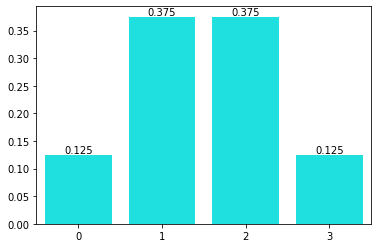

In [3]:
ax = sns.barplot(x=X, y=prob, color='aqua')
ax.bar_label(ax.containers[0]);

---

## Probability models

---

### Example 1

Dalia owns a gravel pit. She took a random sample of rocks and counted $58$ sedimentary rocks, $213$ metamorphic rocks, and $522$ igneous rocks.

**Use the observed frequencies to create a probability model for Dalia randomly selecting one rock from her gravel pit.**  
_Input your answers as fractions or as decimals rounded to the nearest hundredth._

In [4]:
sed, met, ign = 58, 213, 522
X = np.array([sed, met, ign])
S = X.sum()
P = X / S
P.round(2)

array([0.07, 0.27, 0.66])

---

## Probability with discrete random variables

---

### Example 1

Hugo plans to buy packs of baseball cards until he gets the card of his favorite player, but he only has enough money to buy at most $4$ packs. Suppose that each pack has probability $0.20$ of containing the card Hugo is hoping for.

Let the random variable $X$ be the number of packs of cards Hugo buys. Here is the probability distribution for $X$:

|X|1|2|3|4|
|:-|:-|:-|:-|:-|
|P(X)|0.2|0.16|0.128|0.512|

In [5]:
display(Latex(f"$P(X \geq 2) = 0.16 + 0.128 + 0.512 = {0.16 + 0.128 + 0.512}$"))

<IPython.core.display.Latex object>

---

## [Expected Value](https://en.wikipedia.org/wiki/Expected_value)

> [Expected value (basic)](https://www.khanacademy.org/math/statistics-probability/random-variables-stats-library/random-variables-discrete/a/expected-value-basic)

In [probability theory](https://en.wikipedia.org/wiki/Probability_theory "Probability theory"), the **expected value** (also called **expectation**, **mathematical expectation**, **mean**, **average**, or **first moment**) is a generalization of the [weighted average](https://en.wikipedia.org/wiki/Weighted_average "Weighted average"). Informally, the expected value is the [arithmetic mean](https://en.wikipedia.org/wiki/Arithmetic_mean "Arithmetic mean") of a large number of [independently](https://en.wikipedia.org/wiki/Independence_(probability_theory) "Independence (probability theory)") selected [outcomes](https://en.wikipedia.org/wiki/Experiment_(probability_theory) "Experiment (probability theory)") of a [random variable](https://en.wikipedia.org/wiki/Random_variable "Random variable").

The expected value of a random variable $X$ is often denoted by $E[X]$, $E(X)$, or $EX$, with $E$ also often stylized as $E$ or ${\displaystyle \mathbb {E} .}$

$\displaystyle {E} [X]=\sum _{i=1}^{\infty }x_{i}\,p_{i}$

$\displaystyle {Var} (X)=\operatorname {E} [X^{2}]-(\operatorname {E} [X])^{2}$

In [6]:
def rv_mean(X, P):
    """rv_mean calculates the expected value (also known as mean) of the random variable X.

    Args:
        X (array like): Random Variable X.
        P (array like): The probability distribution of random variable X.

    Returns:
        float: The expected value (also known as mean) the random variable X.
    """
    mu = np.average(a=X, weights=P)

    return mu

In [7]:
def rv_std(X, P):
    """rv_std calculates the standard deviation of the random variable X.

    Args:
        X (array like): Random Variable X.
        P (array like): The probability distribution of random variable X.

    Returns:
        float: The standard deviation of the random variable X.
    """
    mu = rv_mean(X, P)
    sd = np.sum((X - mu)**2 * P)**0.5

    return sd

---

### Example 1

Mahnoor owns and operates Mahnoor's Coffee Shop. The city of Laketown, Australia, where Mahnoor's Coffee Shop is located, recently enacted a ban on all foam cups to help protect the environment.

Instead of switching to paper cups, Mahnoor has decided to risk being fined by the city and to continue to use foam cups. She estimates that this will save her $10,000$ Australian dollars. She also estimates that there is a $12\%$ chance that she will be fined. The fine would be for $100,000$ Australian dollars.

**Find the expected value of Mahnoor's decision to continue to use foam cups.**

||Value|Probability|Value * Probability|
|:-:|:-:|:-:|:-:|
|Mahnoor is fined|-90,000|0.12|-10,800|
|Mahnoor is not fined|10,000|0.88|8800|

The expected value is -10,800 + 8,000 = -2000 Australian dollars.

---

## Mean (expected value) of a discrete random variable

---

### Example 1

Marvin the monkey is taking a multiple choice test as part of an experiment. There are $4$ questions on the test and each question has $2$ different answer choices. Since Marvin is a monkey, he will be guessing on each question.

The test is graded according to the grading scheme below.

**What is the expected number of points Marvin will score?**  
Round your answer to the nearest hundredth.

|Correct answers|0|1|2|3|4|
|:-:|:-:|:-:|:-:|:-:|:-:|
|Points|0|3|5|7|10|

In [8]:
n, p = 4, 1/2
ks = np.arange(n+1)
points = np.array([0, 3, 5, 7, 10])
df = pd.DataFrame({'Correct answers': ks, 'Points': points})
df

,Correct answers,Points
0,0,0
1,1,3
2,2,5
3,3,7
4,4,10


In [9]:
df['Probability'] = df['Correct answers'].apply(lambda k: binom.pmf(k, n, p))
df

,Correct answers,Points,Probability
0,0,0,0.0625
1,1,3,0.2500
2,2,5,0.3750
3,3,7,0.2500
4,4,10,0.0625


In [10]:
display(Latex(f"$E[X] = {sum(df['Probability'] * df['Points'])}$"))

<IPython.core.display.Latex object>

---

## Standard deviation of a discrete random variable

---

### Example 1

A patient is sick with a certain infection where the treatment involves taking $\$20$ dollar drug that has a $90\%$ chance of curing the infection. If that drug doesn't work, then the patient takes an $\$80$ dollar drug that is almost guaranteed to cure the infection.

The table below displays the probability distribution of $X =$ the total amount of money a randomly selected patient spends on this treatment plan.

|X = total spent|\$20|\$100|
|:-:|:-:|:-:|
|P(X)|90%|10%|

Calculate $\mu_X$ and $\sigma_X$

In [11]:
X = np.array([20, 100])
P = np.array([0.9, 0.1])

In [12]:
display(Latex(f"$E[X] = {rv_mean(X, P)}$"))
display(Latex(f"$\sigma = {rv_std(X, P)}$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

---

### Example 2: Expected Value & Cumulative

Rory has entered The Irish Gunman’s Open. In The Irish Gunman’s Open, Rory will hit golf balls at targets. If he hits the target, he will advance to the next stage, and if he misses the target, Rory will exit The Open. The Open consists of $4$ possible stages.

If the best stage Rory completes is the second stage, he will win $100$ euros. If the best stage Rory completes is the third stage, Rory will win a total of $300$ euros. If he can complete all $4$ stages, he will win a total of $1000$ euros.

Because each stage gets progressively more difficult, the probability of Rory hitting the targets decreases. The probability of Rory hitting each target given that he has reached that stage is given in the data table below.

**What is the expected value of Rory's prize money from The Irish Gunman's Open?**  
Round your answer to the nearest hundredth.

In [13]:
stage = np.array([1, 2, 3, 4])
probability = np.array([.6, .5, .4, .3])
prize = np.array([0, 100, 300, 1000])

df = pd.DataFrame({'Stage': stage, 'Probability': probability, 'Prize': prize})
df

,Stage,Probability,Prize
0,1,0.6,0
1,2,0.5,100
2,3,0.4,300
3,4,0.3,1000


In [14]:
p4 = 0.6 * 0.5 * 0.4 * 0.3
p3 = 0.6 * 0.5 * 0.4 * 0.7
p2 = 0.6 * 0.5 * 0.6
p1 = 1 - (p4 + p3 + p2)
E = np.sum(np.array([0, 100, 300, 1000]) * np.array([p1, p2, p3, p4]))
E = round(E, 2)
display(Latex(f"$E[X] = {E}$"))

<IPython.core.display.Latex object>

---

### Example 3: Exptected Value - Combs

Vera has challenged Alexey to a round of Marker Mixup. Marker Mixup is a game where there is a bag of $5$ red markers numbered $1$ through $5$, and another bag with $5$ green markers numbered $6$ through $10$.

Alexey will grab $1$ marker from each bag, and if the $2$ markers add up to more than $12$, he will win $\$5$. If the sum is exactly $12$, he will break even, and If the sum is less than $12$, he will lose $\$6$.

**What is Alexey's expected value of playing Marker Mixup?**  
Round your answer to the nearest cent.

In [15]:
import itertools
from itertools import product

In [16]:
red = [1, 2, 3, 4, 5]
green = [6, 7, 8, 9, 10]

In [17]:
combs = np.array(list(product(red, green)))
combs

array([[ 1,  6],
       [ 1,  7],
       [ 1,  8],
       [ 1,  9],
       [ 1, 10],
       [ 2,  6],
       [ 2,  7],
       [ 2,  8],
       [ 2,  9],
       [ 2, 10],
       [ 3,  6],
       [ 3,  7],
       [ 3,  8],
       [ 3,  9],
       [ 3, 10],
       [ 4,  6],
       [ 4,  7],
       [ 4,  8],
       [ 4,  9],
       [ 4, 10],
       [ 5,  6],
       [ 5,  7],
       [ 5,  8],
       [ 5,  9],
       [ 5, 10]])

In [18]:
p_more_than_12 = np.sum(np.sum(combs, axis=1) > 12) / len(combs)
p_equal_to_12 = np.sum(np.sum(combs, axis=1) == 12) / len(combs)
p_less_than_12 = np.sum(np.sum(combs, axis=1) < 12) / len(combs)
print(p_more_than_12)
print(p_equal_to_12)
print(p_less_than_12)

0.24
0.16
0.6


In [19]:
E = p_more_than_12 * 5 + p_equal_to_12 * 0 + p_less_than_12 * -6
E = round(E, 2)
display(Latex(f"$E[X] = {E}$"))

<IPython.core.display.Latex object>

---

# Continuous random variables

---

## Probability in density curves

---

### Example 1

Consider the density curve below.

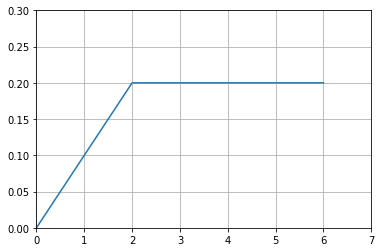

In [20]:
x = np.arange(0, 7)
y = np.array([0, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2])

plt.plot(x, y)
plt.xlim(0, 7)
plt.ylim(0, 0.3)
plt.grid();

**Find the probability that $x$ is less than $2$.**

$\displaystyle P(x < 2) = \frac{2 \cdot 0.2}{2} = 0.2$

---

## Probability in normal density curves

See also [Normal Distribution](./normal_distribution.ipynb)

---

### Example 1

A fuel pump at a gasoline station doesn't always dispense the exact amount displayed on the meter. When the meter reads $1.000\text{ L}$, the amount of fuel a certain pump dispenses is normally distributed with a mean of $1\text{ L}$ and standard deviation of $0.05\text{ L}$. Let $X=$ the amount dispensed in a random trial when the meter reads $1.000\text{ L}$.

**Find $P(X<1)$.**

In [21]:
# probability below a value
dp, mu, sd = 1, 1, 0.05
precision = 2
prob = NormalDist(mu=mu, sigma=sd).cdf(x=dp)
prob = round(prob, precision)
display(Latex(f"$P(X \leq {dp})={prob}$"))

<IPython.core.display.Latex object>

---

# Transforming random variables

---

## Transforming random variables

See [Modeling data distributions](./modeling_data_distributions.ipynb): Effects on linear transformations

---

### Example 1

Mr. Gupta gave his students a quiz with three questions on it. Let $X$ represent the number of questions that a randomly chosen student answered correctly. Here is the probability distribution of $X$ along with summary statistics:

|X = # correct|0|1|2|3|
|:-:|:-:|:-:|:-:|:-:|
|P(X)|0.05|0.20|0.50|0.25|

- Mean: $\mu_X = 1.95$
- SD: $\sigma_X \approx 0.8$

Mr. Gupta decides to score the tests by giving $10$ points for each correct question. He also plans to give every student $5$ additional bonus points. Let $Y$ represent a random student's score.

**What are the mean and standard deviation of $Y$?**

In [22]:
display(Latex(f"$\displaystyle \mu_Y = 1.95 \cdot 10 + 5 = {1.95 * 10 + 5}$"))
display(Latex(f"$\displaystyle \sigma_Y = 0.8 \cdot 10 = {0.8 * 10}$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

---

# Combining random variables

> [Combining random variables](https://www.khanacademy.org/math/statistics-probability/random-variables-stats-library/combine-random-variables/a/combining-random-variables-article)

We can form new distributions by combining random variables. If we know the mean and standard deviation of the original distributions, we can use that information to find the mean and standard deviation of the resulting distribution.

We can combine means directly, but we can't do this with standard deviations. We can combine variances as long as it's reasonable to assume that the variables are independent.

- $E[X+Y] = E[X] + E[Y]$, $E[X-Y] = E[X] - E[Y]$
- $Var[X+Y] = Var[X] + Var[Y]$, $Var[X-Y] = Var[X] + Var[Y]$

- Make sure that the variables are **independent** or that it's reasonable to assume independence, before combining variances.
- **Even when we subtract two random variables, we still add their variances**; subtracting two variables increases the overall variability in the outcomes.
- We can find the standard deviation of the combined distributions by taking the square root of the combined variances.

---

## Combining random variables

---

### Example 1

A factory process requires $3$ steps to finish a product. The steps each have a mean completion time of $\mu=10$ and a standard deviation of $\sigma=5$. The time it takes to complete each step is independent from the other steps. Let $T$ be the total completion time for the $3$ steps.

**Find the standard deviation of $T$.**

In [23]:
display(Latex("$\sigma_{T} = \sqrt{5^{2} \cdot 3} = \sqrt{75}$"))

<IPython.core.display.Latex object>

---

## Combining normal random variables

> [Combining normal random variables](https://www.khanacademy.org/math/statistics-probability/random-variables-stats-library/combine-random-variables/a/combining-normal-random-variables)

When we combine variables that each follow a normal distribution, the resulting distribution is also normally distributed. This lets us answer interesting questions about the resulting distribution.

Review module `norm_rv`, click [here](utils/norm/norm_rv.py).

---

### Example 1: Total

A carnival ride has cars that each hold $4$ adult passengers. The weights of the passengers for this ride are normally distributed with a mean of $65 \text{ kg}$ and a standard deviation of $12 \text{ kg}$. Assume that the weights of passengers are independent from each other.

Let $T =$ the total weight of $4$ selected adult passengers for this ride.

**Find the probability that the total weight exceeds $290 \text{ kg}$.**  
_You may round your answer to two decimal places._

In [24]:
# probability above a value
mu, sd, n = 65, 12, 4
dps = 290
mus = mu * n
sds = (sd**2 * n)**0.5

precision = 2
prob = 1 - NormalDist(mu=mus, sigma=sds).cdf(x=dps)
prob = round(prob, precision)
display(Latex(f"$P(T > {dp}) = {prob}$"))

<IPython.core.display.Latex object>

---

### Example 2: Difference

Some nations require their students to pass an exam before earning their primary school degrees or diplomas. A certain nation gives students an exam whose scores are normally distributed with a mean of $41$ points and a standard deviation of $9$ points.

Suppose we select $2$ of these testers at random, and define the random variable $D$ as the difference between their scores. We can assume that their scores are independent.

**Find the probability that their scores are within $10$ points of each other.**  
_You may round your answer to two decimal places._

In [25]:
# probability between a value
dp1, dp2 = -10, 10
mu1, mu2, sd1, sd2 = 41, 41, 9, 9
mus = mu1 - mu2
sds = (sd1**2 + sd2**2)**0.5

precision = 2
p1 = NormalDist(mu=mus, sigma=sds).cdf(x=dp1)
p2 = 1 - NormalDist(mu=mus, sigma=sds).cdf(x=dp2)
prob = 1 - (p1 + p2)
prob = round(prob, precision)
display(Latex(f"$P({dp1} < D \leq {dp2}) = {prob}$"))

<IPython.core.display.Latex object>

---

### Example 3: Total

A breakfast cereal producer makes its most popular product by combining just raisins and flakes in each box of cereal. The amounts of flakes in the boxes of this cereal are normally distributed with a mean of $370\text{ g}$ and a standard deviation of $24\text{ g}$. The amounts of raisins are also normally distributed with a mean of $170\text{ g}$ and a standard deviation of $7\text{ g}$.

Let $T =$ the total amount of product in a randomly selected box, and assume that the amounts of flakes and raisins are independent of each other.

**Find the probability that the total amount of product exceeds $515\text{ g}$.**  
_You may round your answer to two decimal places._

In [26]:
# probability above a value
dp = 515
mu1, mu2, sd1, sd2 = 370, 170, 24, 7
mus = mu1 + mu2
sds = (sd1**2 + sd2**2)**0.5

precision = 2
prob = 1 - NormalDist(mu=mus, sigma=sds).cdf(x=dp)
prob = round(prob, precision)
display(Latex(f"$P(T > {dp}) = {prob}$"))

<IPython.core.display.Latex object>

---

### Example 4: Difference

Suppose that populations of men and women have the following summary statistics for their heights (in centimeters):

- Men: $\mu_M=172$, $\sigma_M=7.2$
- Women: $\mu_W=162$, $\sigma_W=5.4$

Both distributions are approximately normal. Suppose we randomly select a man and a woman from each population, and calculate the difference between their heights. We can assume that their heights are independent.

**Find the probability that the woman is taller than the man.**  
_You may round your answer to two decimal places._

In [27]:
# probability bellow a value
dp = 0
mu1, mu2, sd1, sd2 = 172, 162, 7.2, 5.4
mus = mu1 - mu2
sds = (sd1**2 + sd2**2)**0.5

# The probabilty that the woman is taller than the man is equal to
# the tall distance between the man and the woman is 0
precision = 2
prob = NormalDist(mu=mus, sigma=sds).cdf(x=dp)
prob = round(prob, precision)
display(Latex(f"$P(D \leq {dp}) = {prob}$"))

<IPython.core.display.Latex object>

---

# Binomial Random Variables

See [Binomial Random Variables](./binomial.ipynb)

Also include:
- [Bernoulli Random Variables](./binomial.ipynb)
- [Geometric Random Variables](./binomial.ipynb)
- [Poisson Random Variables](./binomial.ipynb)

---

# Normal Random Variables

See [Normal Random Variables](./normal.ipynb)

---

# More on expected value

---

## Expected value with empirical probabilities

---

### Example 1

Benji is working to get a job but isn't sure how much he will be able to make. He visited a job search website with thousands of listings and documented a random selection of $50$ jobs at $5$ different starting salary levels. The data he recorded is in the table below.

**Assuming that jobs continue to be listed in the same starting salary proportions, which of the following statements are true?**

In [28]:
df = pd.DataFrame({
    "Starting salary": [30_000, 40_000, 50_000, 60_000, 70_000],
    "Job listed": [19, 2, 6, 17, 6]
})
df

,Starting salary,Job listed
0,30000,19
1,40000,2
2,50000,6
3,60000,17
4,70000,6


In [29]:
df['P(x)'] = df['Job listed'] / df['Job listed'].sum()
df

,Starting salary,Job listed,P(x)
0,30000,19,0.38
1,40000,2,0.04
2,50000,6,0.12
3,60000,17,0.34
4,70000,6,0.12


In [30]:
display(Latex(f"$E[X] = {sum(df['Starting salary'] * df['P(x)'])}$"))

<IPython.core.display.Latex object>

- If Benji were randomly selecting jobs off of this job board, in the long run he should expect to find the same number of jobs with a starting salary of $\$50{,}000$ as jobs with a starting salary of $\$70{,}000$.
- The most likely starting salary of a randomly selected job off of this job board is $\$30{,}000$.

---

## Expected value with calculated probabilities

---

### Example 1

Marvin the monkey is taking a multiple choice test as part of an experiment. There are $4$ questions on the test and each question has $2$ different answer choices. Since Marvin is a monkey, he will be guessing on each question.

The test is graded according to the grading scheme below.

**What is the expected number of points Marvin will score?**

In [31]:
df = pd.DataFrame({
    "Correct answers": [0, 1, 2, 3, 4],
    "Points": [0, 3, 5, 7, 10]
})
df

,Correct answers,Points
0,0,0
1,1,3
2,2,5
3,3,7
4,4,10


In [32]:
n, p = 4, 0.5
binom.mean(n, p)

2.0

$\therefore E[X] = 5$

In [33]:
# or you can also calculate the probability for each case
df['P(X = x)'] = binom.pmf(df['Correct answers'], n, p)
df

,Correct answers,Points,P(X = x)
0,0,0,0.0625
1,1,3,0.2500
2,2,5,0.3750
3,3,7,0.2500
4,4,10,0.0625


In [34]:
display(Latex(f"$E[X] = {sum(df['P(X = x)'] * df.Points)}$"))

<IPython.core.display.Latex object>

---

## Making decisions with expected values

---

### Example 1

Ming is going on a yearlong fishing trip and is deciding whether to use his big lure or his small lure. His big lure is better at catching trout and larger fish that are worth more, while his small lure catches a larger quantity of fish.

Ming performs $80$ experimental casts with each lure. Once he decides which lure to use, he is going to perform $800$ casts with that lure over the next year.

The following table shows the average profit for each type of fish depending on which lure Ming uses:

In [35]:
df1 = pd.DataFrame({"Large lure": [4, 2],
                    "Small lure": [2, 0.5]}, 
                   index=["Profit from trout", "Profit from sunfish"])
df1

,Large lure,Small lure
Profit from trout,4,2.0
Profit from sunfish,2,0.5


In [36]:
df1.loc[2, :] = [0, 0] # add no fish
df1.index = ["Profit from trout", "Profit from sunfish", "No fish"] # add No fish to index
df1

,Large lure,Small lure
Profit from trout,4.0,2.0
Profit from sunfish,2.0,0.5
No fish,0.0,0.0


In [37]:
df2 = pd.DataFrame({"Large lure": [33, 8, 39],
                    "Small lure": [9, 65, 6]}, 
                   index=["Trout", "Sunfish", "No fish"])
df2

,Large lure,Small lure
Trout,33,9
Sunfish,8,65
No fish,39,6


**What is Ming's expected profit if he casts with the large lure?**

In [38]:
df2['P(X = x | Large lure)'] = df2['Large lure'] / df2['Large lure'].sum()
df2['P(X = x | Small lure)'] = df2['Small lure'] / df2['Small lure'].sum()
df2

,Large lure,Small lure,P(X = x | Large lure),P(X = x | Small lure)
Trout,33,9,0.4125,0.1125
Sunfish,8,65,0.1000,0.8125
No fish,39,6,0.4875,0.0750


In [39]:
# convert pandas series to numpy array since we have different index
E = np.sum(df2['P(X = x | Large lure)'].to_numpy() * df1['Large lure'].to_numpy())
E = E * 800
display(Latex(f"$E[X] = {round(E, 2)}$"))

<IPython.core.display.Latex object>

**What is Ming's expected profit if he casts with the small lure?**

In [40]:
# convert pandas series to numpy array since we have different index
E = np.sum(df2['P(X = x | Small lure)'].to_numpy() * df1['Small lure'].to_numpy())
E = E * 800
display(Latex(f"$E[X] = {round(E, 2)}$"))

<IPython.core.display.Latex object>

**To maximize his expected profit, Ming should cast with the large lure**

---

### Example 2

Ahmed is playing a lottery game where he must pick $2$ numbers from $0$ to $9$ and then one letter out of the $26$-letter English alphabet. (He may choose the same number both times.)

If his ticket matches the $2$ numbers and $1$ letter drawn in order, he wins the grand prize and receives $\$10{,}405$. If just his letter matches but one or both of his numbers do not match, he wins the small prize of $\$100$. Under any other outcome, he loses and receives nothing. The game costs him $\$5$ play.

He has chosen the ticket $\text{04R}$.

**What is the expected profit for Ahmed's when he buys a ticket?**  
Round your answer to the nearest hundredth.

$E[X] = P(\text{grand prize}) \cdot (10405 - 5) + P(\text{small prize}) \cdot (100 - 5) + P(\text{no prize}) \dot (-5)$

In [41]:
cost = -5
P_grand_prize, N_grand_price = 1/10 * 1/10 * 1/26, 10405 + cost
P_small_prize, N_small_prize = 1/26 - P_grand_prize, 100 + cost
P_no_prize = 1 - P_small_prize

E = P_grand_prize * N_grand_price + P_small_prize * N_small_prize + P_no_prize * cost
E = round(E, 2)
display(Latex(f"$E[04R] = {E}$"))

<IPython.core.display.Latex object>

---

### Example 3

Jessica is playing a game where there are $4$ blue markers and $6$ red markers in a box. She is going to pick $3$ markers without replacement.

If she picks all $3$ red markers, she will win a total of $\$500$. If the first marker she picks is red but not all $3$ markers are red, she will win a total of $\$100$. Under any other outcome, she will win $\$0$.

**What is the expected value of Jessica's winnings?**  
Round your answer to the nearest cent.

$E[X] = P(\text{R, R, R}) \cdot 500 + (P(\text{R, X, X}) - P(\text{R, R, R})) \cdot 100 + P(\text{others}) \cdot 0$

In [42]:
# R/B, R/B, R/B
N, k = 10, 3
XXX = comb(N, k)
# R, R, R
N, k = 6, 3
# Pr
RRR = comb(N, k)
p1 = RRR / XXX
p1

0.16666666666666666

In [43]:
# R, R (given 5 Reds)
N, k = 5, 2
RR = comb(N, k)
# R/B, R/B (given 9 balls)
N, k = 9, 2
XX = comb(N, k)
# Given the first ball is Red, and the other two balls are not Red
p2 = 6/10 * (XX - RR) / XX
p2

0.43333333333333335

In [44]:
E = p1 * 500 + p2 * 100
E = round(E, 2)
display(Latex(f"$E[X] = {E}$"))

<IPython.core.display.Latex object>

---

### Example 4

Xavier is trying to decide if he should spend $\$25$ to purchase virus protection software for his new computer.

There are currently three viruses in circulation. The software that he is considering purchasing will protect him perfectly from the Trojan virus and the Pikachu virus, but will not protect him from the ADA virus.

Based on his research, Xavier makes the table below which shows the probability and cost of repair for the three viruses currently in circulation. Assume that Xavier can get at most one virus and that this table is accurate.

In [45]:
df = pd.DataFrame({
    "Type of virus": ["Pikachu", "Trojan", "ADA"], 
    "Cost of repair $": [400, 200, 300],
    "Probability": [0.2, 0.2, 0.1]})
df

,Type of virus,Cost of repair $,Probability
0,Pikachu,400,0.2
1,Trojan,200,0.2
2,ADA,300,0.1


**What is the expected total cost of viruses and software if Xavier purchases the virus protection software? Round your answer to the nearest dollar.**

In [46]:
300 * 0.1 + 25

55.0

**What is the expected total cost of viruses and software if Xavier does not purchase the virus protection software? Round your answer to the nearest dollar.**

In [47]:
np.sum(df["Cost of repair $"] * df.Probability)

150.0

---

### Example 5

Paul has the option of a high deductible or a low deductible health insurance plan.

If Paul chooses the low deductible plan, he will have to pay the first $\$1000$ of any medical costs, and the rest of the costs will be paid by his insurance company. The low deductible plan costs $\$8000$ for a year.

If Paul chooses the high deductible plan, he will have to pay the first $\$2500$ of any medical costs, and the rest of the costs will be paid by his insurance company. The high deductible plan costs $\$7500$ for a year.

To help himself choose a plan, Paul found some statistics about common health problems for people similar to him. Assume that the table below correctly shows the probabilities and costs of total medical incidents within the next year.

In [48]:
df = pd.DataFrame({
    "Medical costs $": [0, 1000, 4000, 7000, 15000],
    "Probability": [0.3, 0.25, 0.2, 0.2, 0.05]})
df

,Medical costs $,Probability
0,0,0.30
1,1000,0.25
2,4000,0.20
3,7000,0.20
4,15000,0.05


**Including the cost of insurance, what are the expected total medical costs that Paul must pay with the low deductible plan? Round your answer to the nearest dollar.**

In [49]:
deductible, insurance = 1000, 8000
df["Low Deductible"] = df["Medical costs $"].apply(lambda cost: deductible if cost >= deductible else cost)
df

,Medical costs $,Probability,Low Deductible
0,0,0.30,0
1,1000,0.25,1000
2,4000,0.20,1000
3,7000,0.20,1000
4,15000,0.05,1000


In [50]:
np.sum(df["Low Deductible"] * df.Probability) + insurance

8700.0

**Including the cost of insurance, what are the expected total medical costs that Paul must pay with the high deductible plan? Round your answer to the nearest dollar.**

In [51]:
deductible, insurance = 2500, 7500
df["High Deductible"] = df["Medical costs $"].apply(lambda cost: deductible if cost >= deductible else cost)
df

,Medical costs $,Probability,Low Deductible,High Deductible
0,0,0.30,0,0
1,1000,0.25,1000,1000
2,4000,0.20,1000,2500
3,7000,0.20,1000,2500
4,15000,0.05,1000,2500


In [52]:
np.sum(df["High Deductible"] * df.Probability) + insurance

8875.0

**If Paul wants the best payoff in the long run and must buy one of the two insurance plans, he should purchase the `Low Deductible` plan since it has lower expected cost.**

---

### Example 6

Francisco is at the arcade and can buy a token for $\$2$ that gives him the choice of playing either Smack the Mole or Motorcycle Chasers.

**Smack the Mole:** He plays 3 rounds, and for each round he has a $30\%$, percent chance of smacking the mole. If he smacks the mole in all $3$ rounds, he will win a stuffed bear worth $\$50$.

**Motorcycle Chasers:** He will participate in $4$ races, and for each race he has an $80\%$, percent chance of winning the race. If he wins all $4$ races, he will win a replica motorcycle worth $\$70$.

**What is Francisco's expected value from playing Smack the Mole? Round your answer to the nearest cent.**

In [53]:
round(0.3**3 * (50-2) + (1 - 0.3**3) * -2, 2)

-0.65

**What is Francisco's expected value from playing Motorcycle Chasers? Round your answer to the nearest cent.**

In [54]:
round(0.8**4 * (70-2) + (1 - 0.8**4) * -2, 2)

26.67

---

## Law of large numbers

> [Law of large numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers)

In [probability theory](https://en.wikipedia.org/wiki/Probability_theory "Probability theory"), the **law of large numbers** (**LLN**) is a [theorem](https://en.wikipedia.org/wiki/Theorem "Theorem") that describes the result of performing the same experiment a large number of times. According to the law, the [average](https://en.wikipedia.org/wiki/Average "Average") of the results obtained from a large number of trials should be close to the [expected value](https://en.wikipedia.org/wiki/Expected_value "Expected value") and tends to become closer to the expected value as more trials are performed.

$\displaystyle \lim _{n\to \infty }\sum _{i=1}^{n}{\frac {X_{i}}{n}}={\overline {X}}$